# Project n. 7 "Do mammals lay eggs?"
"I mammiferi depongono le uova?"

0. Premises
1. Exploring Data
2. Data Visualization
3. Data Quality Assessment and Missing Values
4. Preprocessing
5. Training & Accuracy Results

'Premise 1 (pessimistic). Murphy's law (which extends, from life in general, also to the scope of programming): "if anything can go wrong, it will"' 

'Premise 2 (optimistic). We use the golden principle of programming taught to us by our Professor: "whatever you do with the computer will ALMOST never eplode." (Alfio Ferrara).With respect to the Benevolent Dictator for Life' 

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


'Premise 3 (Inspiring and rebalancing)'
'And finally we enter to the Python world by being inspired first by the import.this instruction that summarizes the spirit of Python. In particular: "Simple is better than complex. If the implementation is easy to explain, it may be a good idea." This principle of Python was already known at least by William of Ockham whose "razor" is a pillar of modern science:«Frustra fit per plura quod fieri potest per pauciora.» ("You do unnecessarily with many things what you can do with a few.", In libros Sententiarum).' 

# Exploring data

In [2]:
import numpy as np
import pandas as pd

In [3]:
dataclass = pd.read_csv ("class.csv")

In [4]:
dataclass
# abbiamo 7 classi fondamentali, per circa 100 (101) animali, distribuite in modo non uniforme
# la tabella degli animali viene chiamata qui datazoo e poi la tabella delle classi dataclass (nome un po' lungo forse ma per non confondersi poi)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [5]:
datazoo = pd.read_csv ("zoo.csv")

In [6]:
datazoo
# I 101 animali del nostro data set sono contraddistinti da 16 caratteristiche distintive diverse: 
# i valori di queste caratteristiche sono espressi in modalità boolenana ad eccezione dell'attributo "legs"che è numerico. 
# A parte questo non sembrano vi siano dati nulli o mancanti ma questo richiede un approfondimento (vedi dopo).  
# Il fatto che legs abbia valori non binari e compresi tra 0 e 8 può essere un problema? lo vedremo dopo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [7]:
datazoo.head

<bound method NDFrame.head of     animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  t

In [8]:
datazoo.info ()
# qui sotto si fornisce il tipo dei valori e il count dei not null. 
# come si vede vi è un object (animal_name) e 17 interi (di cui l'ultimo indica la classe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [9]:
for k, v in datazoo.dtypes.items ():
    print (k, v)
# usiamo qui sotto una funzione che dà un elenco dei campi 

animal_name object
hair int64
feathers int64
eggs int64
milk int64
airborne int64
aquatic int64
predator int64
toothed int64
backbone int64
breathes int64
venomous int64
fins int64
legs int64
tail int64
domestic int64
catsize int64
class_type int64


# Data visualization

In [10]:
import matplotlib.pyplot as plt

In [11]:
cols = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed','backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']

In [12]:
datazoo[cols]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [13]:
datazoo.describe ()
# qui sotto utilizziamo lo strumento describe sempre per esplorare i dati, 
# (dà una indicazione dei valori statistici di base come media, deviaziazione standard, minimo e massimo)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [14]:
datazoo.isna().any()
# riproviamo con questo comando isna().any() la presenza di valori nulli

animal_name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
class_type     False
dtype: bool

In [15]:
datazoo.isna().sum ()
# stesso processo di sopra ma cumulativo con sum

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [16]:
datazoo.isnull ()
# ulteriore verifica con isnull

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# 3 Data quality assessment and missing values
Valutazione della qualità dei dati e i valori mancanti: non ci sono missing values e la qualità dei dati sembra buona

In [17]:
datazoo.animal_name.unique()
# qui sotto restituiamo la lista degli oggetti presenti nel data set in formato più leggibile. 
# Tra le curiosità che spiccano: "aardvark" che cosa é? Trattasi di un oritteropo (o armadillo del Sudafrica). 

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [18]:
print(datazoo.class_type.unique())
# Controlliamo se il type della classe ha valori corretti 

[1 4 2 7 6 5 3]


In [19]:
print(datazoo.legs.unique())
# Un dato curioso attira la nostra attenzione. 
# Il risultato qui sopra infatti farebbe pensare ad un errore nei dati. 
# Un animale con 5 zampe? Verifichiamo di cosa si tratta. 

[4 0 2 6 8 5]


In [20]:
datazoo.loc[datazoo ['legs'] == 5]
# in realtà non è un errore: si tratta di una stella marina, con 5 punte o braccia che il data set considera "legs".

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7


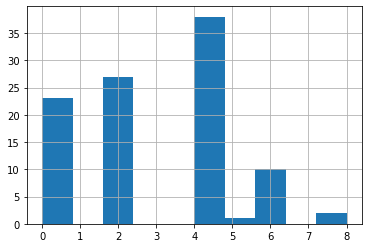

In [21]:
legs = datazoo.legs
legs.hist()
# mostriamo un boxplot relativo alla presenza di gambe nelle varie classi (la classe 5 è fish e contiene la stella marina)

In [22]:
df=pd.merge(datazoo,dataclass,how='right',left_on='class_type',right_on='Class_Number')
df.head (3)
# facciamo un join tra la tabella degli animali (datazoo) e la tabella delle classi e mostriamo una nuova e più completa classe

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


(array([41., 20.,  5., 13.,  4.,  8., 10.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

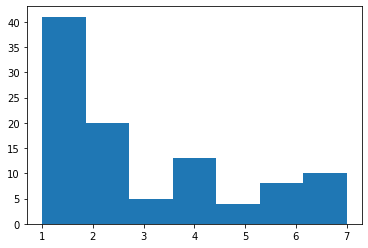

In [23]:
plt.hist(df.class_type, bins=7)
# facciamo un istogramma per visualizzare le sette classi 

In [24]:
import seaborn as sns
sns.set(style="dark") 
sns.set(style="dark", color_codes=True)
#importiamo seaborn per fare l'istogramma e scegliamo il background dark style per i plot

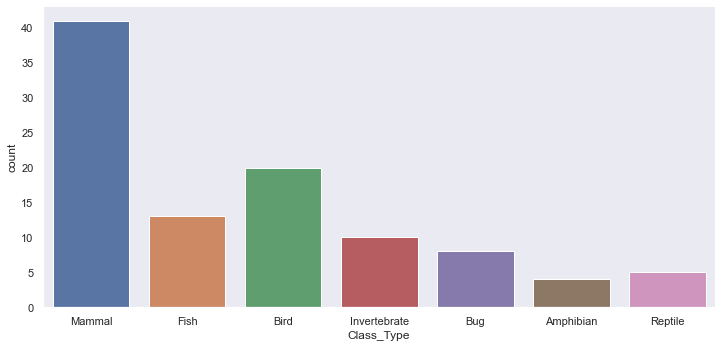

In [25]:
sns.catplot('Class_Type', data=df,kind="count", aspect=2)
# rappresentiamo graficamente l'appartenenza degli animali per ogni classe

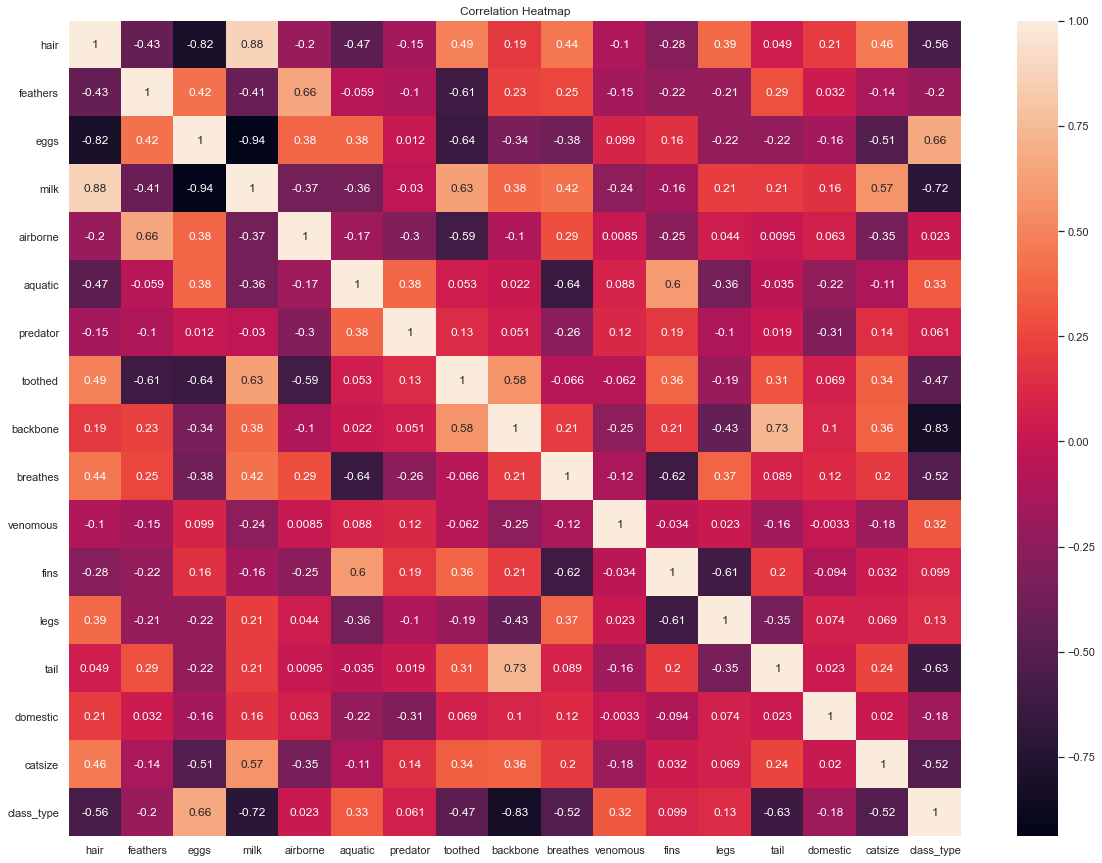

In [26]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = datazoo.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# mostriamo le correlazioni con una Correlation Heatmap

In [27]:
corr[corr != 1][abs(corr)> 0.75].dropna(how='all', axis=1).dropna(how='all', axis=0)
# evidenziamo le correlazioni significative con valore superiore al 75%, sia positive che negative

,hair,eggs,milk,backbone,class_type
hair,NaN,-0.817382,0.878503,NaN,NaN
eggs,-0.817382,NaN,-0.938848,NaN,NaN
milk,0.878503,-0.938848,NaN,NaN,NaN
backbone,NaN,NaN,NaN,NaN,-0.828845
class_type,NaN,NaN,NaN,-0.828845,NaN


In [28]:
df.groupby('Class_Type').mean()
# usiamo grupby. Qui vediamo che ovviamente in corrispondenza di "milk" (allattamento) abbiamo i mammiferi 
# e di "feathers" gli uccelli
# Da questo schema, tuttavia, vediamo che ci sono dei mammiferi, seppure in misura irrisoria (0,024), che depongono le uova 
# (e così si dà risposta al quesito posto nel titolo)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class
Class_Type,,,,,,,,,,,,,,,,,,,
Amphibian,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.750000,1.00000,1.0,1.0,0.250000,0.000000,4.000000,0.250000,0.000000,0.000000,5.0,5.0,4.0
Bird,0.00000,1.0,1.00000,0.0,0.80000,0.300000,0.450000,0.00000,1.0,1.0,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000,2.0,2.0,20.0
Bug,0.50000,0.0,1.00000,0.0,0.75000,0.000000,0.125000,0.00000,0.0,1.0,0.250000,0.000000,6.000000,0.000000,0.125000,0.000000,6.0,6.0,8.0
Fish,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.692308,1.00000,1.0,0.0,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692,4.0,4.0,13.0
Invertebrate,0.00000,0.0,0.90000,0.0,0.00000,0.600000,0.800000,0.00000,0.0,0.3,0.200000,0.000000,3.700000,0.100000,0.000000,0.100000,7.0,7.0,10.0
Mammal,0.95122,0.0,0.02439,1.0,0.04878,0.146341,0.536585,0.97561,1.0,1.0,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488,1.0,1.0,41.0
Reptile,0.00000,0.0,0.80000,0.0,0.00000,0.200000,0.800000,0.80000,1.0,0.8,0.400000,0.000000,1.600000,1.000000,0.000000,0.200000,3.0,3.0,5.0
